# Best City to Study in

### Coursera IBM Applied Data Science - Capstone Course

by Joseph M Camilleri

Import necessary modules

In [1]:
import pandas as pd # manipulate data with dataframes

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import numpy as np

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import matplotlib to draw graphs
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.display import display, Markdown #to generate markdown programmatically

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

Create the main datafame to hold the Cities to be considered

In [106]:
cities = {'City': ['London','Tokyo','Melbourne','Munich','Berlin','Montreal','Mumbai','Beijing'],
        'Country': ['United Kingdom','Japan','Australia','Germany','Germany','Canada','India','China']}
Cities = pd.DataFrame(cities, columns = ['City','Country'])
Cities

,City,Country
0,London,United Kingdom
1,Tokyo,Japan
2,Melbourne,Australia
3,Munich,Germany
4,Berlin,Germany
5,Montreal,Canada
6,Mumbai,India
7,Beijing,China


Define the types of venue of interest

In [52]:
interest_df = {'interest': ['Theater','Basketball','Track','University','Indian','Dance']}
interest_df = pd.DataFrame(interest_df, columns = ['interest'])
interest_df

,interest
0,Theater
1,Basketball
2,Track
3,University
4,Indian
5,Dance


Use Pandas read_html to extract data in in tables in the HTML pages for crime and cost of living ranking of Cities

In [4]:
safety_url = 'https://www.numbeo.com/crime/rankings.jsp'
safety_list = pd.read_html(safety_url)
cost_url = 'https://www.numbeo.com/cost-of-living/rankings.jsp'
cost_list = pd.read_html(cost_url)

Check how many table have been read

In [5]:
print('Safety List contains ',len(safety_list),' tables')
print('Cost of Living List contains ',len(cost_list),' tables')

Safety List contains  3  tables
Cost of Living List contains  3  tables


Check the contents of each table

In [9]:
print(safety_list[0])

    0                                                  1
0 NaN  whenDocReady(function() {  jQuery('#city_selec...


In [10]:
print(safety_list[1])

    0      1
0 NaN  Tweet


In [11]:
print(safety_list[2])

     Rank                                City  Crime Index  Safety Index
0     NaN                  Caracas, Venezuela        84.57         15.43
1     NaN              Pretoria, South Africa        81.89         18.11
2     NaN            San Pedro Sula, Honduras        81.35         18.65
3     NaN      Port Moresby, Papua New Guinea        81.05         18.95
4     NaN      Pietermaritzburg, South Africa        80.93         19.07
5     NaN                Durban, South Africa        80.80         19.20
6     NaN          Johannesburg, South Africa        80.31         19.69
7     NaN                   Fortaleza, Brazil        78.51         21.49
8     NaN              Rio de Janeiro, Brazil        77.42         22.58
9     NaN                  Kabul, Afghanistan        77.22         22.78
10    NaN        Port Elizabeth, South Africa        76.85         23.15
11    NaN                      Recife, Brazil        76.81         23.19
12    NaN                Porto Alegre, Brazil      

In [12]:
print(cost_list[0])

    0                                                  1
0 NaN  whenDocReady(function() {  jQuery('#city_selec...


In [13]:
print(cost_list[1])

    0      1
0 NaN  Tweet


In [14]:
print(cost_list[2])

     Rank                              City  Cost of Living Index  Rent Index  \
0     NaN               Zurich, Switzerland                131.49       64.37   
1     NaN               Lugano, Switzerland                130.75       40.20   
2     NaN                Basel, Switzerland                130.65       46.61   
3     NaN               Geneva, Switzerland                126.08       66.56   
4     NaN             Lausanne, Switzerland                125.03       51.99   
5     NaN                 Bern, Switzerland                116.53       41.60   
6     NaN       New York, NY, United States                100.00      100.00   
7     NaN                 Trondheim, Norway                 98.23       34.32   
8     NaN                 Stavanger, Norway                 97.91       32.75   
9     NaN                      Oslo, Norway                 95.78       40.23   
10    NaN                    Bergen, Norway                 94.78       31.59   
11    NaN  San Francisco, CA

Create two dataframes for each table for Safety and Cost of Living

In [6]:
safety_df=safety_list[2]
cost_df=cost_list[2]

Let's have a look at the Safety dataframe

In [7]:
print('Safety data frame')
safety_df.head()

Safety data frame


,Rank,City,Crime Index,Safety Index
0,NaN,"Caracas, Venezuela",84.57,15.43
1,NaN,"Pretoria, South Africa",81.89,18.11
2,NaN,"San Pedro Sula, Honduras",81.35,18.65
3,NaN,"Port Moresby, Papua New Guinea",81.05,18.95
4,NaN,"Pietermaritzburg, South Africa",80.93,19.07


Prepare the Safety data frame by splitting out the City and the Country and removing the extra columns

In [8]:
safety_df[['City1','City2','City3']] = safety_df.City.str.split(',',expand=True) 
safety_df.City3 = safety_df.City2.where(safety_df['City3'].isnull(),safety_df['City3'])
safety_df['City3'] = safety_df['City3'].str[1:]
cols = [0,1,2,5]
safety_df=safety_df.drop(safety_df.columns[cols],axis=1,inplace=False)
safety_df.columns = ['Safety Index', 'City', 'Country']
#safety_df.head()
safety_df.iloc[ 170:180 , : ]

,Safety Index,City,Country
170,54.14,Newcastle,Australia
171,54.27,Lodz,Poland
172,54.29,New York,United States
173,54.46,Katowice,Poland
174,54.50,Buffalo,United States
175,54.63,Kristiansand,Norway
176,54.70,Toulouse,France
177,54.82,Chisinau,Moldova
178,54.83,Tunis,Tunisia
179,54.94,San Jose,United States


Let's have a look at the Cost  dataframe

In [9]:
print('Cost data frame')
cost_df.head()

Cost data frame


,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,"Zurich, Switzerland",131.49,64.37,98.80,131.23,120.39,121.12
1,NaN,"Lugano, Switzerland",130.75,40.20,86.66,134.80,115.19,101.15
2,NaN,"Basel, Switzerland",130.65,46.61,89.72,126.05,131.92,109.90
3,NaN,"Geneva, Switzerland",126.08,66.56,97.10,123.84,119.47,108.09
4,NaN,"Lausanne, Switzerland",125.03,51.99,89.46,125.56,118.13,110.86


Prepare the Cost data frame by splitting out the City and the Country and removing the extra columns

In [10]:
cost_df[['City1','City2','City3']] = cost_df.City.str.split(',',expand=True) 
cost_df.City3 = cost_df.City2.where(cost_df['City3'].isnull(),cost_df['City3'])
cost_df['City3'] = cost_df['City3'].str[1:]
cols = [0,1,3,4,5,6,7,9]
cost_df=cost_df.drop(cost_df.columns[cols],axis=1,inplace=False)
cost_df.columns = ['Cost of Living Index', 'City', 'Country']
#cost_df.head()
cost_df.iloc[ 100:110 , : ]

,Cost of Living Index,City,Country
100,73.69,Brussels,Belgium
101,73.66,Antwerp,Belgium
102,73.21,Montpellier,France
103,73.12,Gothenburg,Sweden
104,73.12,Spokane,United States
105,72.98,Limerick,Ireland
106,72.82,Rome,Italy
107,72.82,Columbus,United States
108,72.81,Albany,United States
109,72.69,Sliema,Malta


Link the 2 data frames for safety and cost into the cities data frame

In [107]:
Cities = pd.merge(Cities, safety_df,  how='left', left_on=['City','Country'], right_on = ['City','Country'])
Cities = pd.merge(Cities, cost_df,  how='left', left_on=['City','Country'], right_on = ['City','Country'])
Cities

,City,Country,Safety Index,Cost of Living Index
0,London,United Kingdom,47.66,78.83
1,Tokyo,Japan,76.60,89.69
2,Melbourne,Australia,55.53,73.76
3,Munich,Germany,82.71,75.56
4,Berlin,Germany,58.92,67.02
5,Montreal,Canada,70.74,64.10
6,Mumbai,India,57.26,28.87
7,Beijing,China,65.48,44.21


Let's visualise safety and cost of living on a bar chart

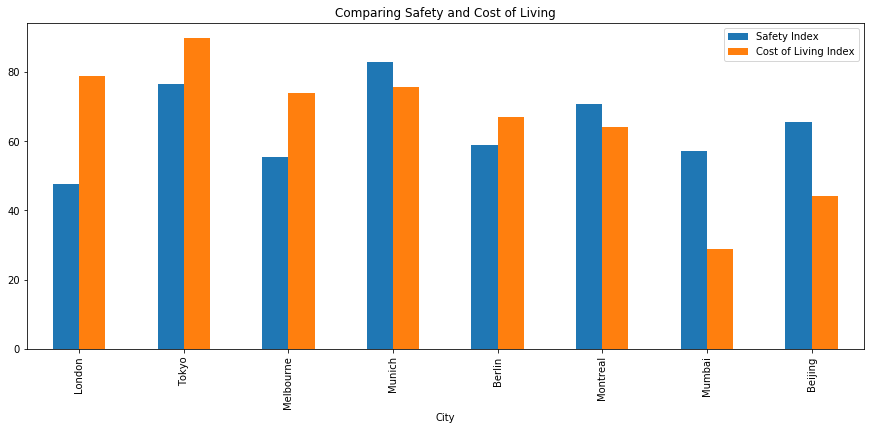

In [108]:
graph_df = Cities.copy()

graph_df.set_index('City', inplace=True)
graph_df.plot(kind='bar', figsize=(15, 6))

plt.xlabel('City') # add to x-label to the plot
plt.title('Comparing Safety and Cost of Living') # add title to the plot

plt.show()

Let's get the geographical cordinates of each City

In [109]:
geolocator = Nominatim(user_agent="city_explorer")
Cities["Latitude"] = 0.0
Cities["Longitude"] = 0.0

for index, row in Cities.iterrows():
    address = row['City']+', '+row['Country']
    location = geolocator.geocode(address) 
    Cities.at[index,'Latitude'] = location.latitude
    Cities.at[index,'Longitude'] = location.longitude

Cities

,City,Country,Safety Index,Cost of Living Index,Latitude,Longitude
0,London,United Kingdom,47.66,78.83,51.507322,-0.127647
1,Tokyo,Japan,76.60,89.69,35.682839,139.759455
2,Melbourne,Australia,55.53,73.76,-37.814218,144.963161
3,Munich,Germany,82.71,75.56,48.137108,11.575382
4,Berlin,Germany,58.92,67.02,52.517037,13.388860
5,Montreal,Canada,70.74,64.10,45.497216,-73.610364
6,Mumbai,India,57.26,28.87,19.075990,72.877393
7,Beijing,China,65.48,44.21,39.906217,116.391276


# Check out the venues of interest in each city

Add the interest as columns in the Cities dataframe

In [110]:
for ind in interest_df.index: 
    Cities[interest_df['interest'][ind]] = 0
    
Cities

,City,Country,Safety Index,Cost of Living Index,Latitude,Longitude,Theater,Basketball,Track,University,Indian,Dance
0,London,United Kingdom,47.66,78.83,51.507322,-0.127647,0,0,0,0,0,0
1,Tokyo,Japan,76.60,89.69,35.682839,139.759455,0,0,0,0,0,0
2,Melbourne,Australia,55.53,73.76,-37.814218,144.963161,0,0,0,0,0,0
3,Munich,Germany,82.71,75.56,48.137108,11.575382,0,0,0,0,0,0
4,Berlin,Germany,58.92,67.02,52.517037,13.388860,0,0,0,0,0,0
5,Montreal,Canada,70.74,64.10,45.497216,-73.610364,0,0,0,0,0,0
6,Mumbai,India,57.26,28.87,19.075990,72.877393,0,0,0,0,0,0
7,Beijing,China,65.48,44.21,39.906217,116.391276,0,0,0,0,0,0


Define Foursquare Credentials and Version

In [21]:
CLIENT_ID = 'HZU4IZ12TXWTZIKPO1KZNFJUX35ESNIYCN3KGZWGA1QVETDQ' # my Foursquare ID
CLIENT_SECRET = 'AZT25W3KWSFHHQKICKPY2GKT0OVWKGNTVAWOE0LZ54ZCCC5S' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [111]:
radius = 1000
LIMIT = 100

for ind_1 in Cities.index: # iterate through cities
    for ind_2 in interest_df.index: # interate through interests
        lat = Cities['Latitude'][ind_1]
        long = Cities['Longitude'][ind_1]
        search_query = interest_df['interest'][ind_2]
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, long, VERSION, search_query, radius, LIMIT)
        results = requests.get(url).json()
        temp_venues = results['response']['venues']
        Cities.iloc[ind_1, Cities.columns.get_loc(interest_df['interest'][ind_2])] = len(temp_venues)

Cities

,City,Country,Safety Index,Cost of Living Index,Latitude,Longitude,Theater,Basketball,Track,University,Indian,Dance
0,London,United Kingdom,47.66,78.83,51.507322,-0.127647,22,1,3,10,14,8
1,Tokyo,Japan,76.60,89.69,35.682839,139.759455,5,0,1,1,5,1
2,Melbourne,Australia,55.53,73.76,-37.814218,144.963161,2,5,2,50,19,15
3,Munich,Germany,82.71,75.56,48.137108,11.575382,23,1,4,1,4,3
4,Berlin,Germany,58.92,67.02,52.517037,13.388860,18,3,1,3,3,0
5,Montreal,Canada,70.74,64.10,45.497216,-73.610364,0,0,0,1,0,1
6,Mumbai,India,57.26,28.87,19.075990,72.877393,1,0,0,0,7,1
7,Beijing,China,65.48,44.21,39.906217,116.391276,1,0,0,1,0,0


In order to visualise the data of interest above it will be normalised

In [112]:
for ind_2 in interest_df.index:
    Col_head = interest_df['interest'][ind_2]
    Cities[Col_head] = Cities[Col_head]/Cities[Col_head].max()

Cities

,City,Country,Safety Index,Cost of Living Index,Latitude,Longitude,Theater,Basketball,Track,University,Indian,Dance
0,London,United Kingdom,47.66,78.83,51.507322,-0.127647,0.956522,0.2,0.75,0.20,0.736842,0.533333
1,Tokyo,Japan,76.60,89.69,35.682839,139.759455,0.217391,0.0,0.25,0.02,0.263158,0.066667
2,Melbourne,Australia,55.53,73.76,-37.814218,144.963161,0.086957,1.0,0.50,1.00,1.000000,1.000000
3,Munich,Germany,82.71,75.56,48.137108,11.575382,1.000000,0.2,1.00,0.02,0.210526,0.200000
4,Berlin,Germany,58.92,67.02,52.517037,13.388860,0.782609,0.6,0.25,0.06,0.157895,0.000000
5,Montreal,Canada,70.74,64.10,45.497216,-73.610364,0.000000,0.0,0.00,0.02,0.000000,0.066667
6,Mumbai,India,57.26,28.87,19.075990,72.877393,0.043478,0.0,0.00,0.00,0.368421,0.066667
7,Beijing,China,65.48,44.21,39.906217,116.391276,0.043478,0.0,0.00,0.02,0.000000,0.000000


Let's plot the data into a bar chart to visualise it

In [113]:
graph_df = Cities.copy()
graph_df.drop(graph_df.columns[1:6], axis=1, inplace=True)
graph_df.set_index('City', inplace=True)
graph_df

,Theater,Basketball,Track,University,Indian,Dance
City,,,,,,
London,0.956522,0.2,0.75,0.20,0.736842,0.533333
Tokyo,0.217391,0.0,0.25,0.02,0.263158,0.066667
Melbourne,0.086957,1.0,0.50,1.00,1.000000,1.000000
Munich,1.000000,0.2,1.00,0.02,0.210526,0.200000
Berlin,0.782609,0.6,0.25,0.06,0.157895,0.000000
Montreal,0.000000,0.0,0.00,0.02,0.000000,0.066667
Mumbai,0.043478,0.0,0.00,0.00,0.368421,0.066667
Beijing,0.043478,0.0,0.00,0.02,0.000000,0.000000


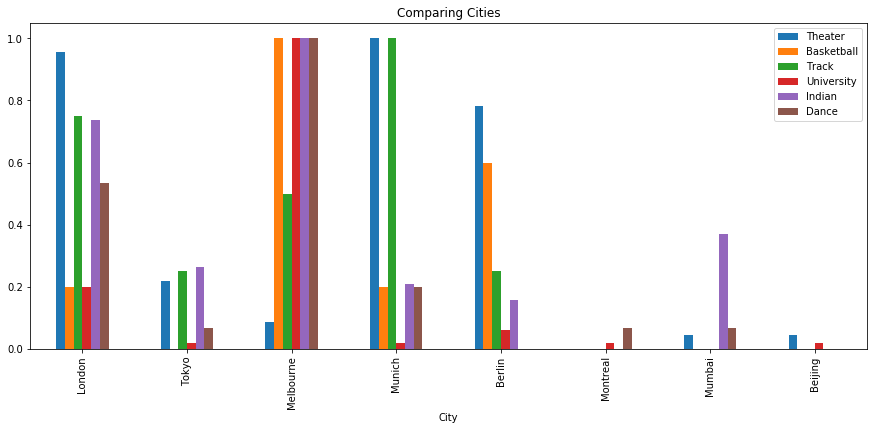

In [114]:
graph_df.plot(kind='bar', figsize=(15, 6))

plt.xlabel('City') # add to x-label to the plot
plt.title('Comparing Cities') # add title to the plot

plt.show()

Let's explore each city and see the most common venues in each

Let's define the get_category_type function

In [33]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [34]:
#Set the radius and LIMIT parameter for the Foursquare API call
radius = 1000
LIMIT = 100

The function below is to exract venues in all the cities

In [115]:
def getNearbyVenues(names, latitudes, longitudes, radius=200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print('   '+name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Run the above function on each city and create a new dataframe called venues

In [116]:
print('Explore API call for ...')
venues = getNearbyVenues(names=Cities['City'],
                                   latitudes=Cities['Latitude'],
                                   longitudes=Cities['Longitude']
                                  )
print('-- Done --')

Explore API call for ...
   London
   Tokyo
   Melbourne
   Munich
   Berlin
   Montreal
   Mumbai
   Beijing
-- Done --


Let's check the size of the resulting dataframe

In [92]:
print(venues.shape)
venues.head()

(148, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,London,51.507322,-0.127647,National Gallery,51.508876,-0.128478,Art Museum
1,London,51.507322,-0.127647,Trafalgar Square,51.507987,-0.128048,Plaza
2,London,51.507322,-0.127647,East Trafalgar Square Fountain,51.508088,-0.127700,Fountain
3,London,51.507322,-0.127647,Trafalgar Square Lions,51.507641,-0.127888,Outdoor Sculpture
4,London,51.507322,-0.127647,Sainsbury Wing National Gallery,51.508384,-0.129001,Art Museum


Let's check how many venues were returned for each City

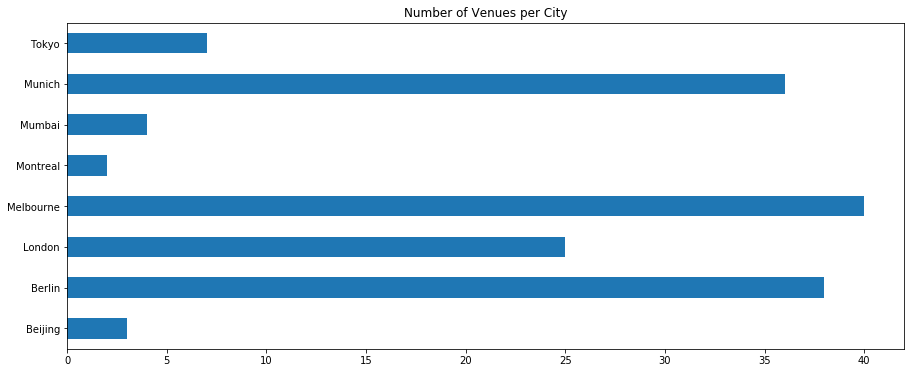

In [117]:
graph_df = venues.groupby('City').count().copy()
graph_df.drop(graph_df.columns[1:6], axis=1, inplace=True)

graph_df.plot(kind='barh', figsize=(15, 6))

plt.ylabel('')
plt.legend().remove()
plt.title('Number of Venues per City') # add title to the plot

plt.show()

Let's find out how many unique categories can be curated from all the returned venues

In [118]:
print(venues['Venue Category'].unique())
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

['Art Museum' 'Plaza' 'Fountain' 'Outdoor Sculpture' 'Church'
 'Monument / Landmark' 'Bookstore' 'Theater' 'Spa' 'Hotel'
 'Thai Restaurant' 'Pub' 'Café' 'Sandwich Place' 'Art Gallery'
 'Cocktail Bar' 'Tour Provider' 'Park' 'Historic Site' 'Restaurant'
 'Italian Restaurant' 'Coffee Shop' 'Wine Bar' 'Dessert Shop'
 'Brazilian Restaurant' 'Bar' 'Japanese Restaurant' 'Comic Shop'
 'Asian Restaurant' 'Indonesian Restaurant' 'Toy / Game Store'
 'Clothing Store' 'Pizza Place' 'Argentinian Restaurant' 'Cosmetics Shop'
 'Sushi Restaurant' 'Chocolate Shop' 'Shopping Mall' 'Juice Bar'
 'Shopping Plaza' 'Burger Joint' 'Mexican Restaurant' 'Food Court'
 'Department Store' 'Gourmet Shop' 'Irish Pub' 'Burrito Place'
 'Bavarian Restaurant' 'Sporting Goods Shop' 'Electronics Store'
 'Seafood Restaurant' 'German Restaurant' 'Bakery'
 'Paper / Office Supplies Store' 'Food Stand' 'Pedestrian Plaza' 'Bank'
 'Vegetarian / Vegan Restaurant' 'Opera House' 'Exhibit' 'Souvenir Shop'
 'Gym' 'Beer Garden' 'Perfum

Prepare data to analyse each City using One Hot Encoding

In [119]:
# one hot encoding
cities_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add city column back to dataframe
cities_onehot['City'] = venues['City'] 

# move city column to the first column
Ct = cities_onehot['City']
cities_onehot.drop(labels=['City'], axis=1,inplace = True)
cities_onehot.insert(0, 'City', Ct)

cities_onehot.head()

,City,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Bakery,Bank,Bar,Bavarian Restaurant,Beer Garden,...,Spa,Sporting Goods Shop,Steakhouse,Sushi Restaurant,Thai Restaurant,Theater,Tour Provider,Toy / Game Store,Vegetarian / Vegan Restaurant,Wine Bar
0,London,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,London,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,London,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,London,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,London,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


What is the size of the new dataframe

In [96]:
cities_onehot.shape

(148, 73)

Group rows by city and by taking the mean of the frequency of occurrence of each category

In [120]:
cities_grouped = cities_onehot.groupby('City').mean().reset_index()
cities_grouped

,City,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Bakery,Bank,Bar,Bavarian Restaurant,Beer Garden,...,Spa,Sporting Goods Shop,Steakhouse,Sushi Restaurant,Thai Restaurant,Theater,Tour Provider,Toy / Game Store,Vegetarian / Vegan Restaurant,Wine Bar
0,Beijing,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000,0.00,0.00,0.000,0.000000,0.000000
1,Berlin,0.000,0.000,0.026316,0.000,0.000000,0.000000,0.00,0.000000,0.026316,...,0.000,0.000000,0.026316,0.026316,0.000,0.00,0.00,0.000,0.026316,0.052632
2,London,0.000,0.040,0.080000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.040,0.000000,0.000000,0.000000,0.040,0.04,0.04,0.000,0.000000,0.000000
3,Melbourne,0.025,0.025,0.000000,0.025,0.000000,0.000000,0.05,0.000000,0.000000,...,0.025,0.000000,0.000000,0.025000,0.025,0.00,0.00,0.025,0.000000,0.025000
4,Montreal,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000,0.00,0.00,0.000,0.000000,0.000000
5,Mumbai,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000,0.00,0.00,0.000,0.000000,0.000000
6,Munich,0.000,0.000,0.000000,0.000,0.027778,0.027778,0.00,0.111111,0.000000,...,0.000,0.027778,0.000000,0.000000,0.000,0.00,0.00,0.000,0.000000,0.000000
7,Tokyo,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000,0.00,0.00,0.000,0.000000,0.000000


The size of the new data frame

In [98]:
cities_grouped.shape

(6, 73)

Print each city along with the top 5 most common venues

In [121]:
num_top_venues = 5

for hood in cities_grouped['City']:
    print("----"+hood+"----")
    temp = cities_grouped[cities_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beijing----
               venue  freq
0              Plaza  0.33
1      Historic Site  0.33
2     Scenic Lookout  0.33
3  Mobile Phone Shop  0.00
4   Pedestrian Plaza  0.00


----Berlin----
               venue  freq
0               Café  0.11
1          Bookstore  0.08
2     Clothing Store  0.08
3              Hotel  0.05
4  Mobile Phone Shop  0.05


----London----
               venue  freq
0              Hotel  0.12
1                Pub  0.12
2         Art Museum  0.08
3     Sandwich Place  0.08
4  Outdoor Sculpture  0.08


----Melbourne----
            venue  freq
0    Dessert Shop  0.10
1   Shopping Mall  0.10
2     Coffee Shop  0.05
3  Clothing Store  0.05
4             Bar  0.05


----Montreal----
                     venue  freq
0             Home Service   0.5
1  Health & Beauty Service   0.5
2   Argentinian Restaurant   0.0
3      Monument / Landmark   0.0
4             Perfume Shop   0.0


----Mumbai----
                       venue  freq
0          Indian Restaurant  0

Put the above into a pandas dataframe. 

In [122]:
#First create function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each city

In [123]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['City'] = cities_grouped['City']

for ind in np.arange(cities_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cities_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beijing,Historic Site,Plaza,Scenic Lookout,Clothing Store,Coffee Shop,Comic Shop,Cosmetics Shop,Department Store,Dessert Shop,Electronics Store
1,Berlin,Café,Bookstore,Clothing Store,Wine Bar,Mobile Phone Shop,Exhibit,Hotel,Steakhouse,Breakfast Spot,German Restaurant
2,London,Hotel,Pub,Monument / Landmark,Outdoor Sculpture,Art Museum,Sandwich Place,Cocktail Bar,Church,Café,Plaza
3,Melbourne,Dessert Shop,Shopping Mall,Coffee Shop,Italian Restaurant,Bar,Pizza Place,Clothing Store,Comic Shop,Japanese Restaurant,Indonesian Restaurant
4,Montreal,Home Service,Health & Beauty Service,Food Court,Coffee Shop,Comic Shop,Cosmetics Shop,Department Store,Dessert Shop,Electronics Store,Exhibit
5,Mumbai,Pizza Place,Indian Restaurant,Dessert Shop,Middle Eastern Restaurant,Food Court,Comic Shop,Cosmetics Shop,Department Store,Electronics Store,Exhibit
6,Munich,Café,Bavarian Restaurant,Department Store,Plaza,Gourmet Shop,Bakery,Burrito Place,German Restaurant,Fountain,Food Stand
7,Tokyo,Historic Site,Park,Restaurant,Exhibit,Comic Shop,Cosmetics Shop,Department Store,Dessert Shop,Electronics Store,Food Court


## Cluster cities to deterime which cities are similar based on their most common venues
Run k-means to cluster the cities into clusters

In [124]:
# set number of clusters to be a third of the number of cities in order to force the clustering algorythm to cluster some cities together
kclusters = int(Cities.shape[0] / 3)

cities_grouped_clustering = cities_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cities_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

Create a new dataframe that includes the cluster as well as the top 10 venues for each city.

In [125]:
# add clustering labels
cities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

cities_merged = Cities

# merge toronto_grouped with toronto_data to add latitude/longitude for each city
cities_merged = cities_merged.join(cities_venues_sorted.set_index('City'), on='City')

cities_merged 

,City,Country,Safety Index,Cost of Living Index,Latitude,Longitude,Theater,Basketball,Track,University,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,London,United Kingdom,47.66,78.83,51.507322,-0.127647,0.956522,0.2,0.75,0.20,...,Hotel,Pub,Monument / Landmark,Outdoor Sculpture,Art Museum,Sandwich Place,Cocktail Bar,Church,Café,Plaza
1,Tokyo,Japan,76.60,89.69,35.682839,139.759455,0.217391,0.0,0.25,0.02,...,Historic Site,Park,Restaurant,Exhibit,Comic Shop,Cosmetics Shop,Department Store,Dessert Shop,Electronics Store,Food Court
2,Melbourne,Australia,55.53,73.76,-37.814218,144.963161,0.086957,1.0,0.50,1.00,...,Dessert Shop,Shopping Mall,Coffee Shop,Italian Restaurant,Bar,Pizza Place,Clothing Store,Comic Shop,Japanese Restaurant,Indonesian Restaurant
3,Munich,Germany,82.71,75.56,48.137108,11.575382,1.000000,0.2,1.00,0.02,...,Café,Bavarian Restaurant,Department Store,Plaza,Gourmet Shop,Bakery,Burrito Place,German Restaurant,Fountain,Food Stand
4,Berlin,Germany,58.92,67.02,52.517037,13.388860,0.782609,0.6,0.25,0.06,...,Café,Bookstore,Clothing Store,Wine Bar,Mobile Phone Shop,Exhibit,Hotel,Steakhouse,Breakfast Spot,German Restaurant
5,Montreal,Canada,70.74,64.10,45.497216,-73.610364,0.000000,0.0,0.00,0.02,...,Home Service,Health & Beauty Service,Food Court,Coffee Shop,Comic Shop,Cosmetics Shop,Department Store,Dessert Shop,Electronics Store,Exhibit
6,Mumbai,India,57.26,28.87,19.075990,72.877393,0.043478,0.0,0.00,0.00,...,Pizza Place,Indian Restaurant,Dessert Shop,Middle Eastern Restaurant,Food Court,Comic Shop,Cosmetics Shop,Department Store,Electronics Store,Exhibit
7,Beijing,China,65.48,44.21,39.906217,116.391276,0.043478,0.0,0.00,0.02,...,Historic Site,Plaza,Scenic Lookout,Clothing Store,Coffee Shop,Comic Shop,Cosmetics Shop,Department Store,Dessert Shop,Electronics Store


## Let's Examine the Clusters

In [126]:
for i in range(kclusters):
    display(Markdown('## Examine Cluster '+str(i)))
    temp_df = cities_merged.loc[cities_merged['Cluster Labels'] == i, cities_merged.columns[[0] + list(range(12, cities_merged.shape[1]))]]
    display(temp_df)

## Examine Cluster 0

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,London,0,Hotel,Pub,Monument / Landmark,Outdoor Sculpture,Art Museum,Sandwich Place,Cocktail Bar,Church,Café,Plaza
2,Melbourne,0,Dessert Shop,Shopping Mall,Coffee Shop,Italian Restaurant,Bar,Pizza Place,Clothing Store,Comic Shop,Japanese Restaurant,Indonesian Restaurant
3,Munich,0,Café,Bavarian Restaurant,Department Store,Plaza,Gourmet Shop,Bakery,Burrito Place,German Restaurant,Fountain,Food Stand
4,Berlin,0,Café,Bookstore,Clothing Store,Wine Bar,Mobile Phone Shop,Exhibit,Hotel,Steakhouse,Breakfast Spot,German Restaurant
5,Montreal,0,Home Service,Health & Beauty Service,Food Court,Coffee Shop,Comic Shop,Cosmetics Shop,Department Store,Dessert Shop,Electronics Store,Exhibit
6,Mumbai,0,Pizza Place,Indian Restaurant,Dessert Shop,Middle Eastern Restaurant,Food Court,Comic Shop,Cosmetics Shop,Department Store,Electronics Store,Exhibit


## Examine Cluster 1

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Tokyo,1,Historic Site,Park,Restaurant,Exhibit,Comic Shop,Cosmetics Shop,Department Store,Dessert Shop,Electronics Store,Food Court
7,Beijing,1,Historic Site,Plaza,Scenic Lookout,Clothing Store,Coffee Shop,Comic Shop,Cosmetics Shop,Department Store,Dessert Shop,Electronics Store


# --- the end ---